# Questions

## Increase in surface salinity in the arctic, is there some kind of trend in obersved data? What about models?

## How well does models represent the changes in salinity, and can they be used as a good indication for the future?

## How does sea surface salinity affect the vertical ocean circulation? And is this influence impactfull?

## What can we say about the sea surface salinity in the future, and how will this affect the vertical circulation in the arctic?


In [14]:
import functions as f
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import s3fs
import cftime
import intake
import numpy as np

In [15]:
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))
path='escience2022/Antoine/ESA_SMOS_Arctic_Sea_Surface_Salinity/'
model_path='escience2022/Ada/daily/'
year = 2018
index = 250
sat_files = f.read_satellite_data(num_years=10, path=path)
dat = xr.open_dataset(s3.open(sat_files[year][index])).squeeze()
dat['y'] = dat['y']*1000
dat['x'] = dat['x']*1000
sss = dat['sss']

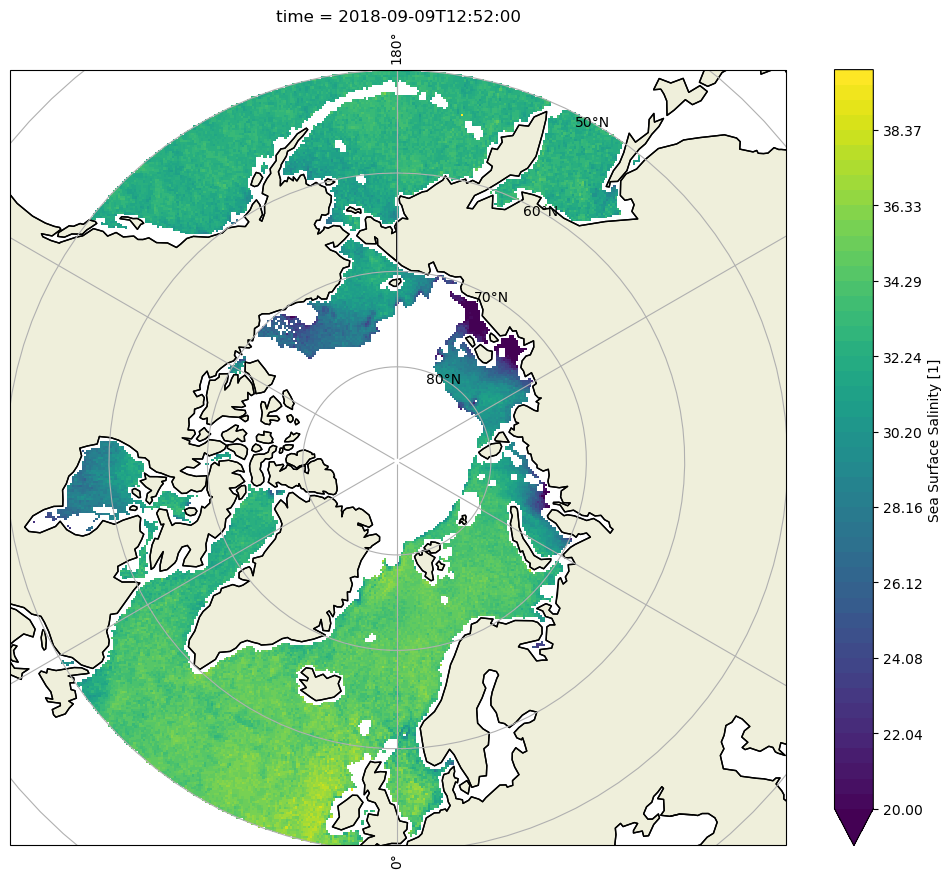

In [16]:
f.plot_sss_sat(sss, levels=50)

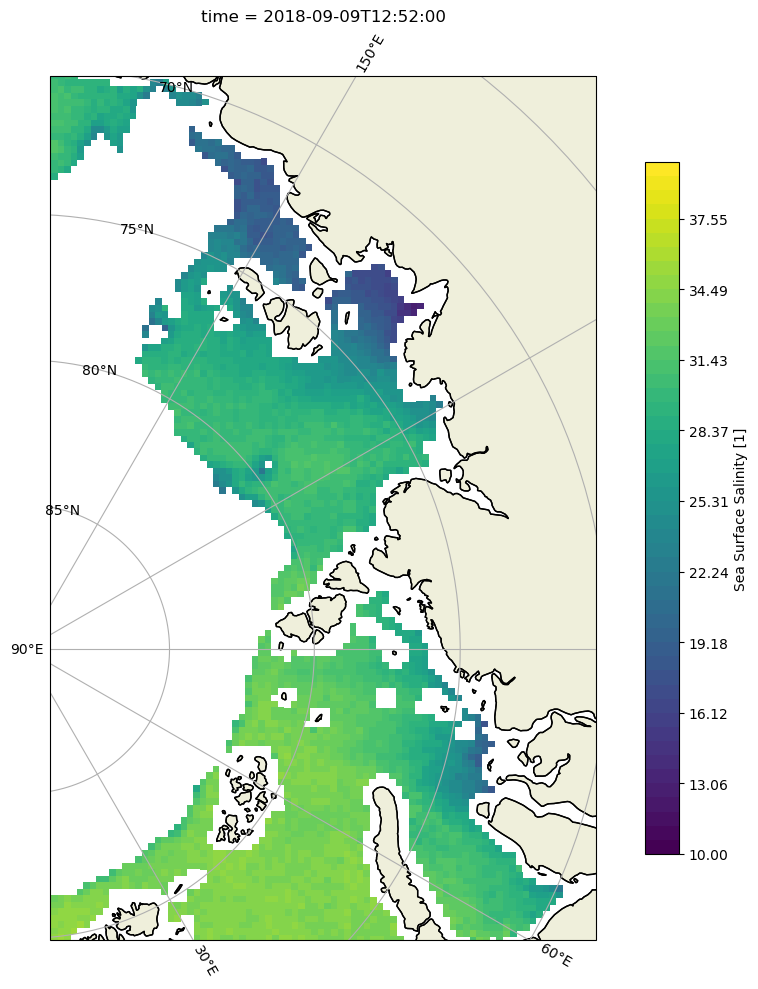

In [17]:
f.plot_sss_sat(sss, levels=50, extent=[60,170,85,70], vmin=10, vmax=40)

In [33]:
from joblib import Parallel, delayed

In [42]:
def _test_func(i):
    time.sleep(0.1)

arr = Parallel(n_jobs=10)(delayed(_test_func)(i) for i in range(10))


1.018197774887085


In [63]:
import time

start = time.time()
def read_files(i):
    return s3.open(sat_files[2011][i])

def create_xr(file):
    return xr.load_dataset(file)

fileset = Parallel(n_jobs=16)(delayed(read_files)(i) for i in sat_files[2013])
xrrs = Parallel(n_jobs=16)(delayed(create_xr)(file) for file in fileset)
print(xrrs)
data = xr.concat(xrrs, dim='time', coords='all')
end = time.time()

print(end-start)
data

[<xarray.Dataset>
Dimensions:      (time: 1, y: 432, x: 432)
Coordinates:
  * time         (time) datetime64[ns] 2011-01-02T21:32:30
  * y            (y) float32 -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
  * x            (x) float32 -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
    lat          (y, x) float32 16.62 16.82 17.02 17.22 ... 17.02 16.82 16.62
    lon          (y, x) float32 -45.0 -44.87 -44.73 -44.6 ... 135.3 135.1 135.0
Data variables:
    crs          int32 -2147483647
    sss          (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    sss_error    (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    sss_anomaly  (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    sss_flag     (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/48)
    title:                     Arctic Sea Surface Salinity L3 map
    institution:               Barcelona Expert Center (BEC), ICM-CSIC, Barce...
    institution_url:         

<xarray.Dataset>
Dimensions:      (time: 365, y: 432, x: 432)
Coordinates:
  * time         (time) datetime64[ns] 2011-01-02T21:32:30 ... 2012-01-01T11:...
  * y            (y) float32 -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
  * x            (x) float32 -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
    lat          (y, x) float32 16.62 16.82 17.02 17.22 ... 17.02 16.82 16.62
    lon          (y, x) float32 -45.0 -44.87 -44.73 -44.6 ... 135.3 135.1 135.0
Data variables:
    crs          (time) int32 -2147483647 -2147483647 ... -2147483647
    sss          (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    sss_error    (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    sss_anomaly  (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    sss_flag     (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/48)
    title:                     Arctic Sea Surface Salinity L3 map
    institution:               Barcelona Expert Center (BEC), ICM-CSIC, Barce...
    institution_url:           http://bec.icm.csic.es
    summary:                   This dataset contains 9-day Level-3 Arctic sea...
    comment:                   These data were produced at BEC as part of the...
    source:                    SMOS L1B version 6.21
    ...                        ...
    sensor:                    SMOS/MIRAS
    spatial_resolution:        35km at nadir
    license:                   This product is distributed under Creative Com...
    license_url:               https://creativecommons.org/licenses/by/4.0/
    copyright:                 If this data is used for publication, the foll...
    doi:                       10.20350/digitalCSIC/12620

<xarray.DataArray 'sss' (y: 432, x: 432)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2011-01-02T21:32:30
  * y        (y) float32 -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
  * x        (x) float32 -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
    lat      (y, x) float32 16.62 16.82 17.02 17.22 ... 17.22 17.02 16.82 16.62
    lon      (y, x) float32 -45.0 -44.87 -44.73 -44.6 ... 135.3 135.1 135.0
Attributes:
    units:          1
    standard_name:  sea_surface_salinity
    long_name:      Sea Surface Salinity
    description:    Sea Surface Salinity [psu]
    grid_mapping:   crs
    valid_min:      0.0
    valid_max:      50.0


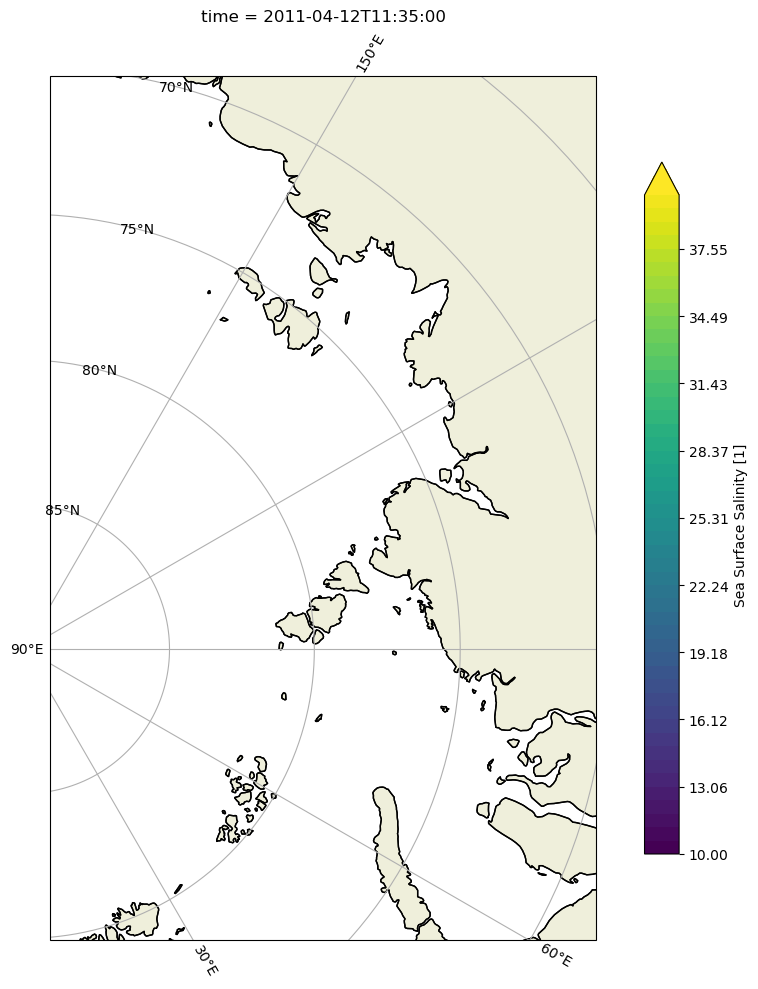

In [60]:
print(data['sss'][0,:,:])
f.plot_sss_sat(data['sss'][100,:,:], levels=50, extent=[60,170,85,70], vmin=10, vmax=40)

In [20]:
model_path='escience2022/Ada/daily/chlos_Oday_NorESM2-LM_historical_r1i1p1f1_gn_18500101-18591231.nc'
dat = xr.open_dataset(s3.open(model_path))
dat

<xarray.Dataset>
Dimensions:             (time: 3650, bnds: 2, j: 385, i: 360, vertices: 4)
Coordinates:
  * time                (time) object 1850-01-01 12:00:00 ... 1859-12-31 12:0...
  * j                   (j) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384 385
  * i                   (i) int32 1 2 3 4 5 6 7 ... 354 355 356 357 358 359 360
    latitude            (j, i) float64 ...
    longitude           (j, i) float64 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object ...
    vertices_latitude   (j, i, vertices) float64 ...
    vertices_longitude  (j, i, vertices) float64 ...
    chlos               (time, j, i) float32 ...
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 1600-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     430335.0
    ...                        ...
    title:                     NorESM2-LM output prepared for CMIP6
    variable_id:               chlos
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/f19fbb04-997a-482a-8643-51b8c1dd3d20

In [21]:
dat['i'] = dat['i']*360/len(dat['i'])
dat['j'] = dat['j']*180/len(dat['j'])
print(dat['j'])
print(dat['i'])

#sat_proj = ccrs.NorthPolarStereo()
#fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':sat_proj})
#dat['chlos'][0].plot.pcolormesh(
#    ax = ax,
#    cbar_kwargs={
#        'orientation':'vertical',
#        'shrink':.8
#        },
#    transform=ccrs.PlateCarree(),
#    )
#ax.set_extent([-180, 180, 90, 50], ccrs.PlateCarree())
#ax.gridlines(draw_labels=True)
#ax.coastlines()
#ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
#fig.tight_layout()


<xarray.DataArray 'j' (j: 385)>
array([  0.467532,   0.935065,   1.402597, ..., 179.064935, 179.532468,
       180.      ])
Coordinates:
  * j        (j) float64 0.4675 0.9351 1.403 1.87 ... 178.6 179.1 179.5 180.0
<xarray.DataArray 'i' (i: 360)>
array([  1.,   2.,   3., ..., 358., 359., 360.])
Coordinates:
  * i        (i) float64 1.0 2.0 3.0 4.0 5.0 ... 356.0 357.0 358.0 359.0 360.0


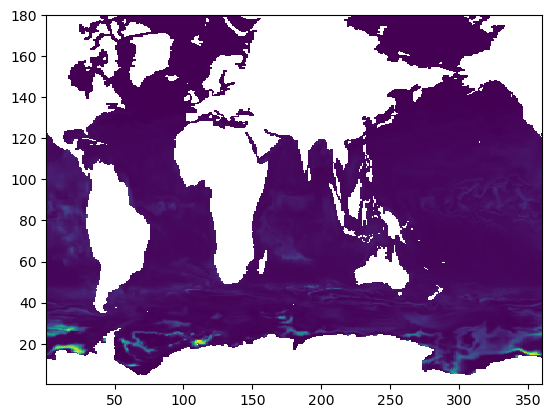

In [24]:
plt.pcolormesh(dat['i'], dat['j'], dat['chlos'][0])

In [ ]:
cat = col.search(source_id=['CESM2'], experiment_id=['historical'], table_id=['Amon'], variable_id=['tas'], member_id=['r1i1p1f1'])
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})

In [ ]:
dataset_list = list(dset_dict.keys())
dset = dset_dict[dataset_list[0]]
print(dset['tas'])

dset['tas'].plot()

In [ ]:
ctd = xr.open_dataset('3901598_prof.nc')
#print(ctd.variables)

ctd['LATITUDE']

In [ ]:
ctd['LONGITUDE']

In [ ]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
st = ctd.isel(ctd['LONGITUDE'] == -3.9, method='nearest')
#specific_station = [ctd['LONGITUDE'].sel(-3.9, method='nearest'), ctd['latitude'].sel(70, method='nearest')]
ax.scatter(ctd['LONGITUDE'][:], ctd['LATITUDE'][:], transform=ccrs.PlateCarree())
ax.scatter(specific_station[0], specific_station[1], c='r')
ax.coastlines()
ax.gridlines(draw_labels=True)